In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
# Reduce the dataset size for both training and testing
train_images, train_labels = train_images[:10000], train_labels[:10000]
test_images, test_labels = test_images[:2000], test_labels[:2000]

In [10]:
train_images[648][21][19]

208

In [11]:
# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
train_images[648][21][19]

0.8156862745098039

In [13]:
train_images[0].shape

(28, 28)

In [14]:
# Reshape images to add channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [15]:
train_images[0].shape

(28, 28, 1)

In [16]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5660 - loss: 1.1903 - val_accuracy: 0.7915 - val_loss: 0.5850
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8071 - loss: 0.5132 - val_accuracy: 0.8300 - val_loss: 0.4866
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8406 - loss: 0.4373 - val_accuracy: 0.8455 - val_loss: 0.4383
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8576 - loss: 0.3908 - val_accuracy: 0.8530 - val_loss: 0.4030
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8779 - loss: 0.3412 - val_accuracy: 0.8745 - val_loss: 0.3798
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8818 - loss: 0.3082 - val_accuracy: 0.8810 - val_loss: 0.3528
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9001 - loss: 0.2725 - val_accuracy: 0.8940 - val_loss: 0.3413
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9037 - loss: 0.2571 - val_acc

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

63/63 - 0s - 5ms/step - accuracy: 0.8820 - loss: 0.3507

Test accuracy: 0.8820000290870667

Test loss: 0.3506649136543274


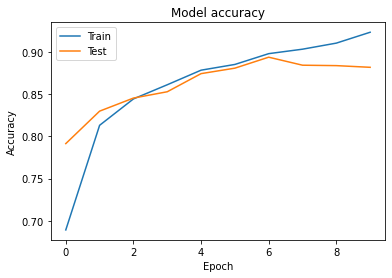

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

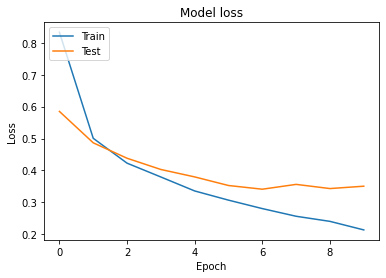

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

In [23]:
# Get predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [24]:
# Test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 0s - 5ms/step - accuracy: 0.8820 - loss: 0.3507

Test accuracy: 0.8820000290870667


In [25]:
# Precision, Recall, and F1-Score
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.8859095565858774
Recall: 0.882
F1 Score: 0.8822640312916403


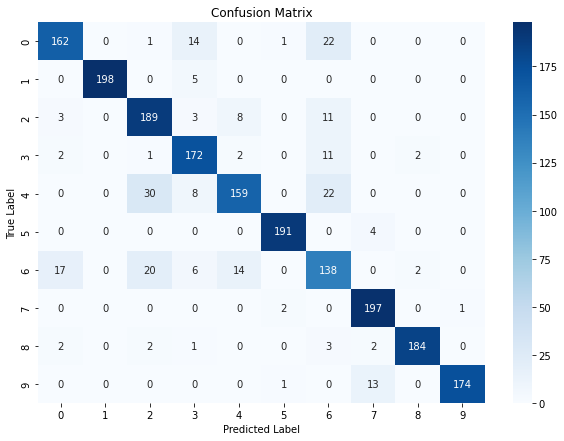

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Classification report
report = classification_report(test_labels, predicted_labels)
print('\nClassification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       200
           1       1.00      0.98      0.99       203
           2       0.78      0.88      0.83       214
           3       0.82      0.91      0.86       190
           4       0.87      0.73      0.79       219
           5       0.98      0.98      0.98       195
           6       0.67      0.70      0.68       197
           7       0.91      0.98      0.95       200
           8       0.98      0.95      0.96       194
           9       0.99      0.93      0.96       188

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000

